Ejemplo del uso de regresión lineal en redes neuronales
El archivo original puede ser encontrado en la siguiente ruta:
https://colab.research.google.com/drive/19jCsd1vSytbYoqOClp9B-HfQf5KSw44S
Para iniciar, se importan las librerías que serán usadas: pandas, mumpy, torch, matplotlib.

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

Se usará un dataset con datos cronológicos relacionados al precio del café

In [3]:
#df = pd.read_csv("https://raw.githubusercontent.com/ralampay/pattern-recognition-course/master/notebooks/FINAL_USO.csv")
df = pd.read_csv("Cafe.csv")

# This examines the first 10 rows of the data frame
df.head(10)

,Fecha,Ultimo,Apertura,Maximo,Minimo,Vol.,% var.
0,17.05.2024,205.65,198.78,207.12,197.88,NaN,4.13%
1,16.05.2024,197.50,198.82,200.32,196.78,NaN,-0.67%
2,15.05.2024,198.83,201.32,202.48,196.60,NaN,-0.92%
3,14.05.2024,200.68,195.70,201.47,192.80,NaN,2.36%
4,13.05.2024,196.05,200.50,204.55,195.15,22.12K,-2.14%
5,10.05.2024,200.33,201.00,203.58,198.85,NaN,-1.65%
6,09.05.2024,203.70,202.30,205.40,202.30,0.00K,1.72%
7,08.05.2024,200.25,201.65,201.65,200.20,0.01K,1.83%
8,07.05.2024,196.65,194.10,197.30,192.15,27.47K,0.74%
9,06.05.2024,195.20,200.10,201.50,194.55,24.50K,-2.76%


In [5]:
attribute = 'Ultimo'


<Axes: >

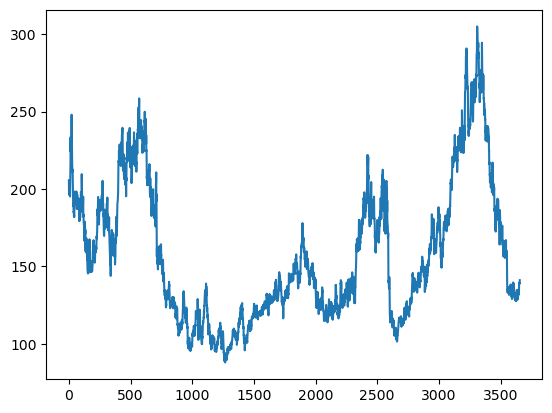

In [7]:

df[attribute].plot()

In [9]:
def sliding_window(data, seq_length):
    x = []
    y = []

    for i in range(len(data) - seq_length):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]

        x.append(_x)
        y.append([_y])

    return np.array(x), np.array(y)

# Change this value to change the sequence length. Initially set to 5
sequence_length = 2

# Change this value to change how much training data we would allocate. Initially set to 0.67
ratio = 0.8

In [11]:
data = df[attribute].values

x, y = sliding_window(data, sequence_length)

train_size = int(len(y) * ratio)
test_size = len(y) - train_size

# Turn them into tensors for computation later on
data_x = Variable(torch.Tensor(np.array(x)))
data_y = Variable(torch.Tensor(np.array(y)))

train_x = Variable(torch.Tensor(np.array(x[0:train_size])))
train_y = Variable(torch.Tensor(np.array(y[0:train_size])))

test_x = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
test_y = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

In [13]:
class MultiLayerPerceptron(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()

        self.hidden = nn.Linear(input_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # f(x) = a(f(x))
        x = F.relu(self.hidden(x))
        y = F.relu(self.output(x))

        return y

In [15]:
# Since each observation's dimensionality is defined by seequence_length, let's use that value
input_size = sequence_length

# Hidden size
hidden_size = 1

# Output size (number of classes)
output_size = 1

# Instantiate the model
model = MultiLayerPerceptron(input_size, hidden_size, output_size)

In [18]:

# Change this to shorted or lengthen training time
epochs = 100

# Change this to modify the learning rate of the optimizer
learning_rate = 0.01

# Change this to a loss function implementation. Initially we'll use MSE
criterion = torch.nn.MSELoss()

# Change this to define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [20]:
for epoch in range(epochs):
    outputs = model.forward(train_x)

    optimizer.zero_grad()

    # obtain the loss function
    loss = criterion(outputs, train_y)

    loss.backward()

    optimizer.step()

    print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 5941.69580
Epoch: 1, loss: 5402.84375
Epoch: 2, loss: 4881.66211
Epoch: 3, loss: 4379.81055
Epoch: 4, loss: 3898.95679
Epoch: 5, loss: 3440.76978
Epoch: 6, loss: 3006.89014
Epoch: 7, loss: 2598.90918
Epoch: 8, loss: 2218.33545
Epoch: 9, loss: 1866.55920
Epoch: 10, loss: 1544.80945
Epoch: 11, loss: 1254.10632
Epoch: 12, loss: 995.20538
Epoch: 13, loss: 768.54218
Epoch: 14, loss: 574.17151
Epoch: 15, loss: 411.70929
Epoch: 16, loss: 280.28000
Epoch: 17, loss: 178.47673
Epoch: 18, loss: 104.34037
Epoch: 19, loss: 55.36445
Epoch: 20, loss: 28.53550
Epoch: 21, loss: 20.41223
Epoch: 22, loss: 27.24383
Epoch: 23, loss: 45.12452
Epoch: 24, loss: 70.17346
Epoch: 25, loss: 98.72225
Epoch: 26, loss: 127.49325
Epoch: 27, loss: 153.74756
Epoch: 28, loss: 175.38611
Epoch: 29, loss: 191.00037
Epoch: 30, loss: 199.86348
Epoch: 31, loss: 201.87320
Epoch: 32, loss: 197.45909
Epoch: 33, loss: 187.46240
Epoch: 34, loss: 173.00569
Epoch: 35, loss: 155.36482
Epoch: 36, loss: 135.85312
Epoch:

In [22]:
model.eval()
predictions = model(test_x).detach().numpy()

predictions = predictions.ravel()

predictions

array([160.39137 , 159.29906 , 160.45378 , 163.7912  , 160.95557 ,
       158.18933 , 160.99617 , 162.14415 , 160.36017 , 161.7544  ,
       161.0966  , 160.31322 , 162.95435 , 164.87425 , 168.42012 ,
       167.17317 , 167.78871 , 174.64104 , 180.44443 , 182.66634 ,
       177.15742 , 172.87721 , 173.42473 , 169.00804 , 172.93237 ,
       171.69563 , 172.43938 , 168.23459 , 173.8657  , 176.60846 ,
       174.63016 , 180.08324 , 179.9831  , 177.74309 , 176.46716 ,
       176.39438 , 172.27731 , 161.92087 , 157.47975 , 160.09183 ,
       164.29678 , 163.8974  , 162.57545 , 165.85866 , 167.10846 ,
       166.27483 , 162.55226 , 161.92838 , 159.6431  , 158.48424 ,
       160.12039 , 160.60283 , 159.68617 , 158.44385 , 161.38641 ,
       162.52275 , 163.61212 , 165.65982 , 166.02582 , 169.96028 ,
       172.12334 , 174.75217 , 173.04634 , 171.1358  , 173.92476 ,
       173.90704 , 177.45064 , 173.05598 , 173.48589 , 175.58269 ,
       175.19673 , 184.42897 , 186.23784 , 187.12723 , 180.650

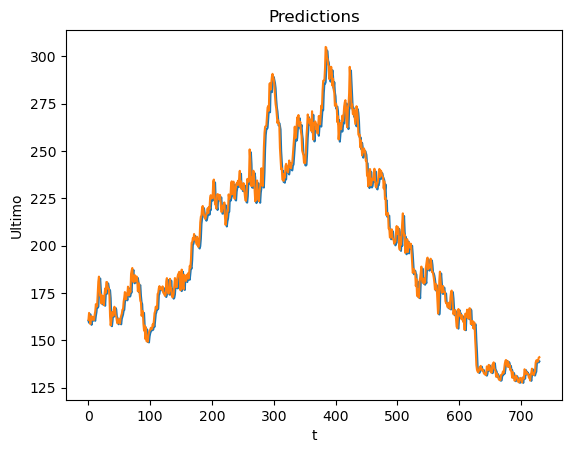

In [24]:
x_axis_values = np.arange(0,len(predictions))

plt.title("Predictions")
plt.xlabel("t")
plt.ylabel(attribute)
plt.plot(x_axis_values, predictions)
plt.plot(x_axis_values, test_y)
plt.show()